In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #for visualization
import matplotlib

In [29]:
data_df = pd.read_csv('Churn.csv')

## Overview of Churn Data

In [3]:
print(f'Number of rows: {data_df.shape[0]}')
print(f'Number of columns: {data_df.shape[1]}')
print(f'\nFeatures :\n{data_df.columns.to_list()}')
print(f'\nMissing data:\n{data_df.isnull().sum()}')

Number of rows: 7043
Number of columns: 21

Features :
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing data:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


##  Overall Churn 

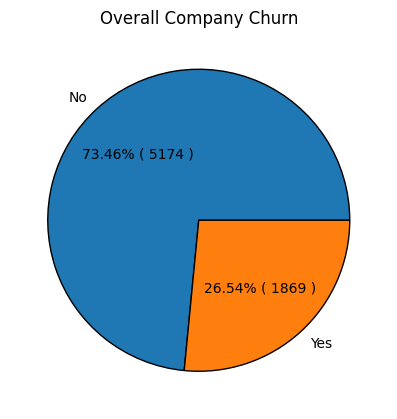

In [14]:
gb_df = data_df.groupby('Churn').size().to_frame().reset_index()
gb_df.rename(columns={0:'Count'},inplace =True)

plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 100
plt.pie(gb_df['Count'],labels = gb_df['Churn'],wedgeprops = {'edgecolor':'black'},
        autopct=lambda p:f'{p:.2f}% ( {p*(gb_df.Count.sum())/100:.0f} )')

plt.title('Overall Company Churn')
plt.show()

## Exploring Categorical Features 

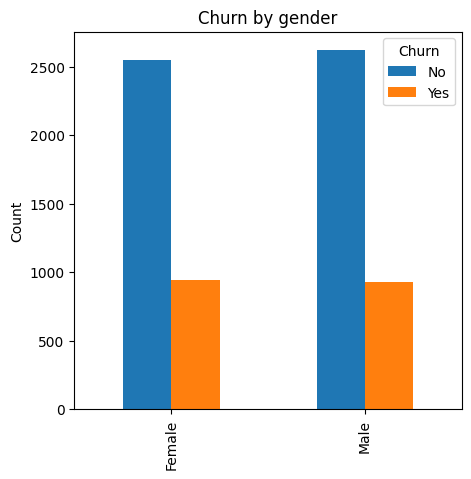

Percentage values of ['Male', 'Female'] are [50.48, 49.52] respectively.


In [133]:
#Define Bar Chart Function
def bar(feature, df = data_df):
    gb_df = df.groupby([feature,'Churn']).size()
    gb_df = gb_df.unstack()
    gb_df.index.name = None    
    
    size = df[feature].count()
    str = f'{df[feature].value_counts().index.to_list()}'
    pcr = f'{round(df[feature].value_counts()/size*100,2).to_list()}'
            
    gb_df.plot(kind = 'bar',ylabel= 'Count', title = f'Churn by {feature}')
    plt.show()
    print(f'Percentage values of {str} are {pcr} respectively.')

bar('gender')

### Churn based on Demography

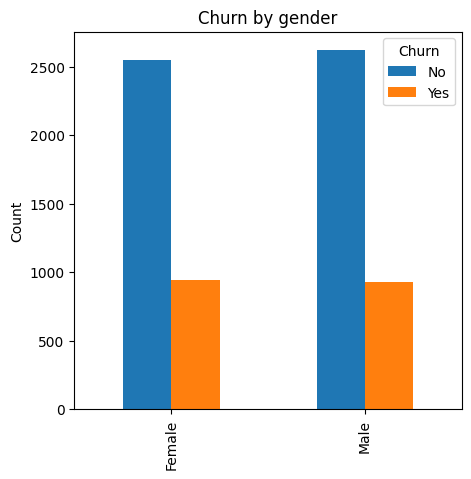

Percentage values of ['Male', 'Female'] are [50.48, 49.52] respectively.


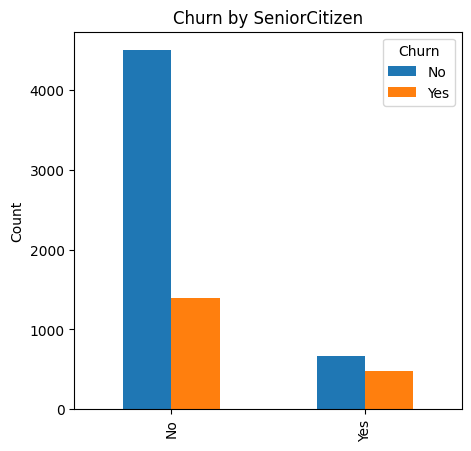

Percentage values of ['No', 'Yes'] are [83.79, 16.21] respectively.


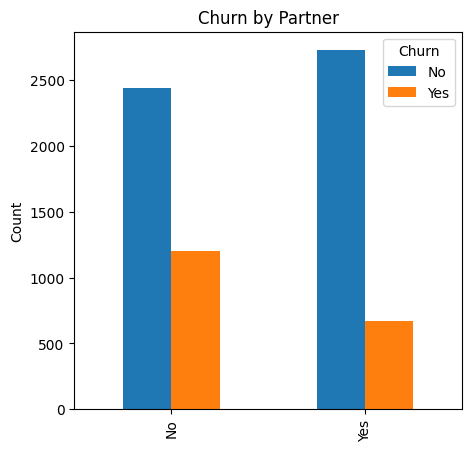

Percentage values of ['No', 'Yes'] are [51.7, 48.3] respectively.


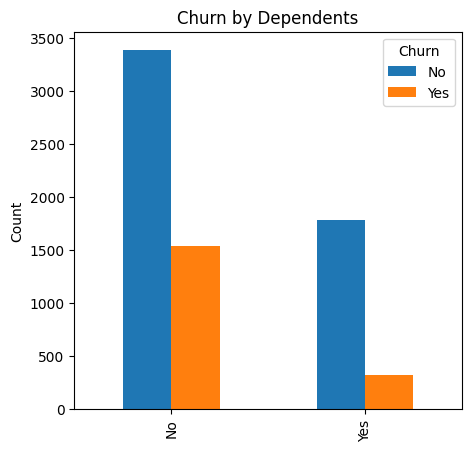

Percentage values of ['No', 'Yes'] are [70.04, 29.96] respectively.


In [134]:
#Gender feature Plots
bar('gender')
#Senior Citizen feature Plots
data_df.loc[data_df['SeniorCitizen']==0,'SeniorCitizen'] = 'No'
data_df.loc[data_df['SeniorCitizen']==1,'SeniorCitizen'] = 'Yes'
bar('SeniorCitizen')
#Partner feature Plots
bar('Partner')
#Dependent feature Plots
bar('Dependents')


### Churn Based On Subscribed Services

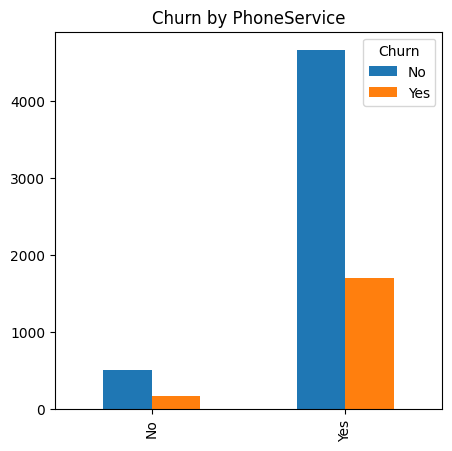

Percentage values of ['Yes', 'No'] are [90.32, 9.68] respectively.


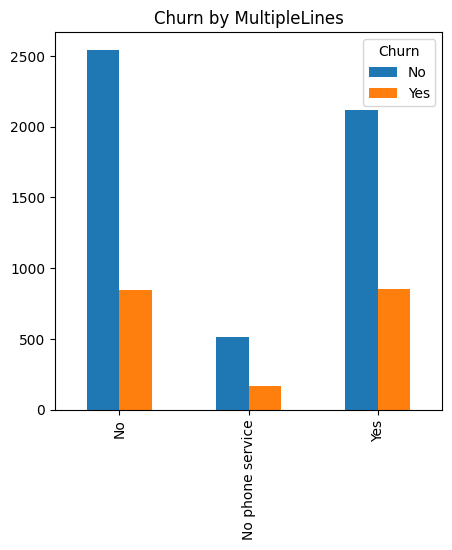

Percentage values of ['No', 'Yes', 'No phone service'] are [48.13, 42.18, 9.68] respectively.


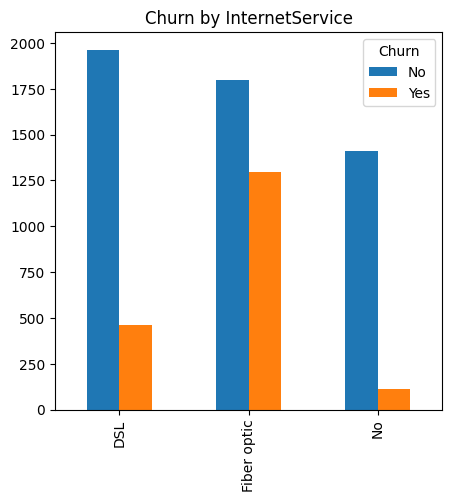

Percentage values of ['Fiber optic', 'DSL', 'No'] are [43.96, 34.37, 21.67] respectively.


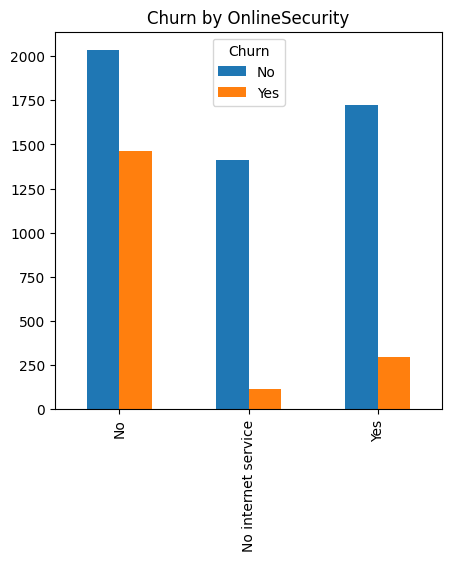

Percentage values of ['No', 'Yes', 'No internet service'] are [49.67, 28.67, 21.67] respectively.


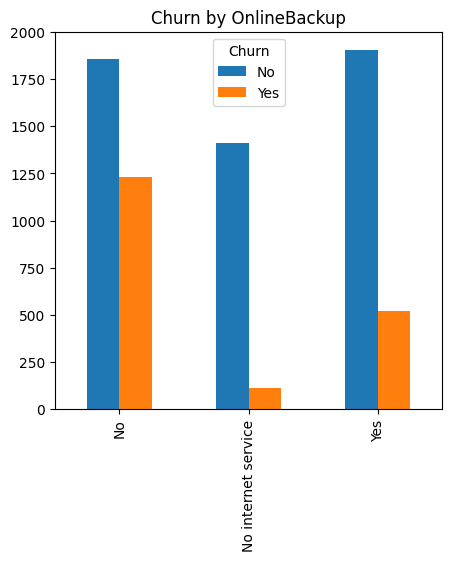

Percentage values of ['No', 'Yes', 'No internet service'] are [43.84, 34.49, 21.67] respectively.


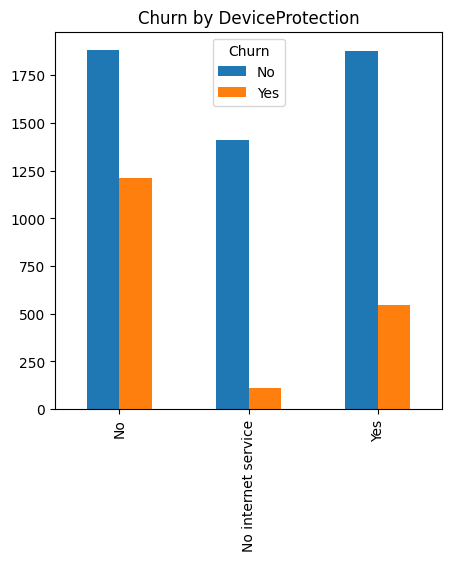

Percentage values of ['No', 'Yes', 'No internet service'] are [43.94, 34.39, 21.67] respectively.


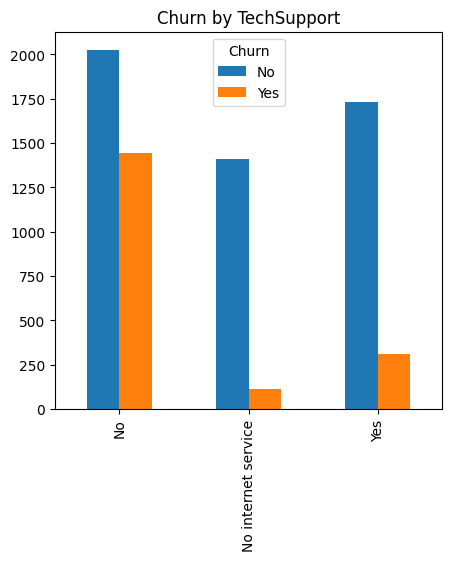

Percentage values of ['No', 'Yes', 'No internet service'] are [49.31, 29.02, 21.67] respectively.


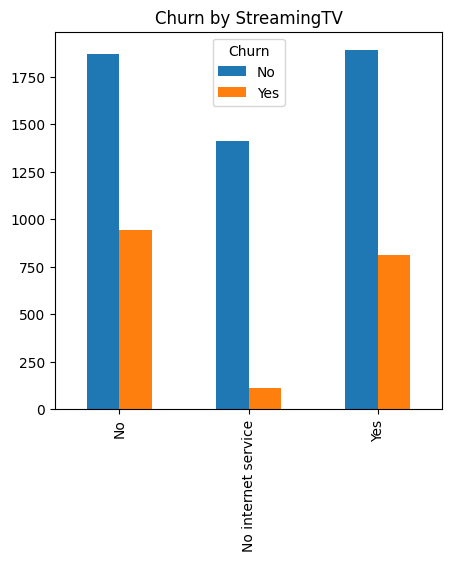

Percentage values of ['No', 'Yes', 'No internet service'] are [39.9, 38.44, 21.67] respectively.


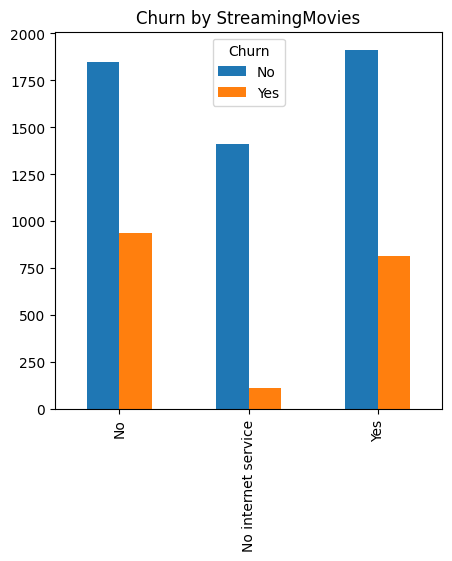

Percentage values of ['No', 'Yes', 'No internet service'] are [39.54, 38.79, 21.67] respectively.


In [73]:
bar('PhoneService')
bar('MultipleLines')
bar('InternetService')
bar('OnlineSecurity')
bar('OnlineBackup')
bar('DeviceProtection')
bar('TechSupport')
bar('StreamingTV')
bar('StreamingMovies')

### Churn Based On Payment Method

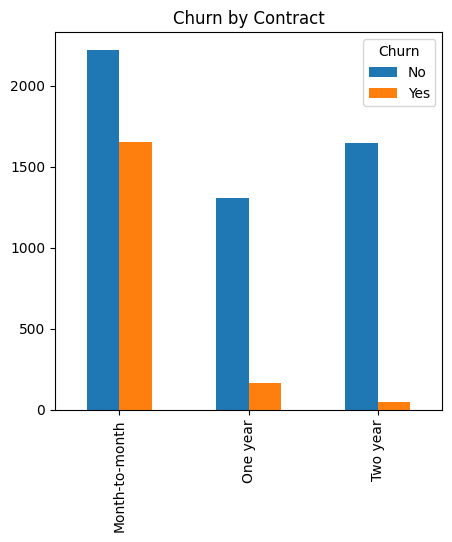

Percentage values of ['Month-to-month', 'Two year', 'One year'] are [55.02, 24.07, 20.91] respectively.


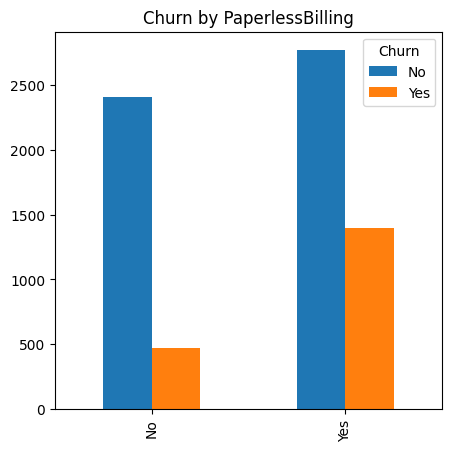

Percentage values of ['Yes', 'No'] are [59.22, 40.78] respectively.


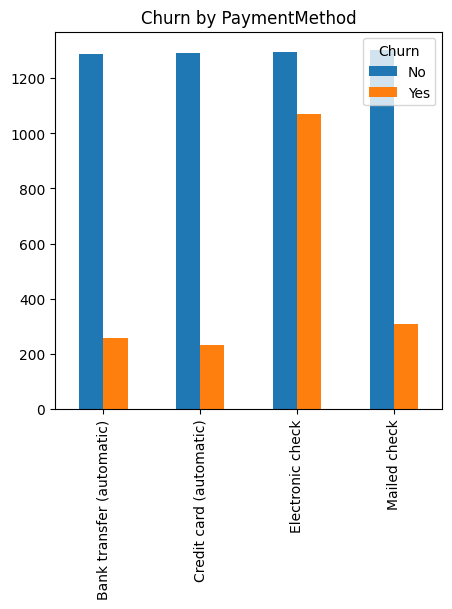

Percentage values of ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'] are [33.58, 22.89, 21.92, 21.61] respectively.


In [74]:
bar('Contract')
bar('PaperlessBilling')
bar('PaymentMethod')

### Explore Numerical Features

In [90]:
data_df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [78]:
try:
    data_df['TotalCharges'] = data_df['TotalCharges'].astype(float)
except ValueError as ve:
    print(ve)

could not convert string to float: ''


In [89]:
data_df['TotalCharges'] = pd.to_numeric(data_df['TotalCharges'],errors = 'coerce')
data_df['TotalCharges'] = data_df['TotalCharges'].fillna(data_df['TotalCharges'].median())

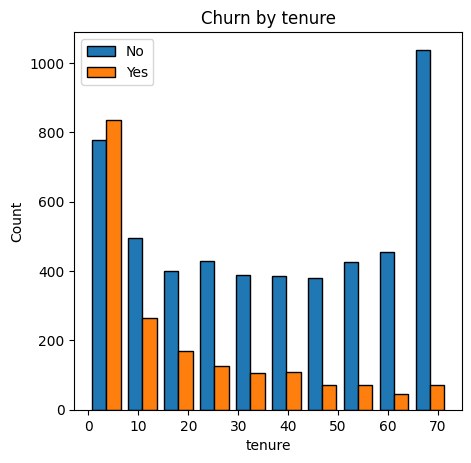

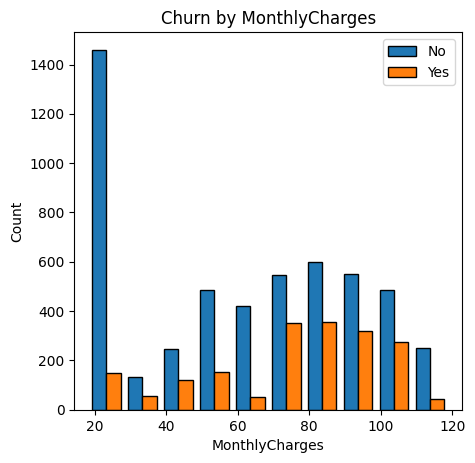

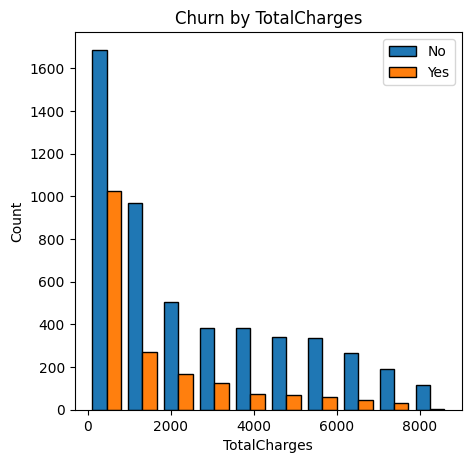

In [141]:
def hist(feature, df = data_df):

    filt= df['Churn'] == 'No'
    plt.hist([df.loc[filt,feature],df.loc[~filt,feature]],bins = 10,edgecolor='black',label=['No','Yes'])
    
    plt.title(f'Churn by {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Count')
    
    plt.legend()
    plt.show()

hist('tenure')
hist('MonthlyCharges')
hist('TotalCharges')